In [48]:
import pandas as pd
from sqlite3 import *
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches
db=connect('wine.db')
wine=pd.read_sql('''select * from wine''',db)

In [31]:
wine.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
#one_sample mean test
stats.ttest_1samp(wine['alcohol'], 0)

Ttest_1sampResult(statistic=391.10602970829825, pvalue=0.0)

In [60]:
group1=wine[wine['quality']==5]['alcohol']
group2=wine[wine['quality']==4]['alcohol']
stats.ttest_ind(group1,group2)

Ttest_indResult(statistic=-3.40572127116697, pvalue=0.00069590448630325939)

In [81]:
gd=wine.groupby('quality')
groups={}
for quality, value in gd['alcohol']:
    groups[quality]=value
stats.ttest_ind(groups[4],groups[5])

Ttest_indResult(statistic=3.40572127116697, pvalue=0.00069590448630325939)

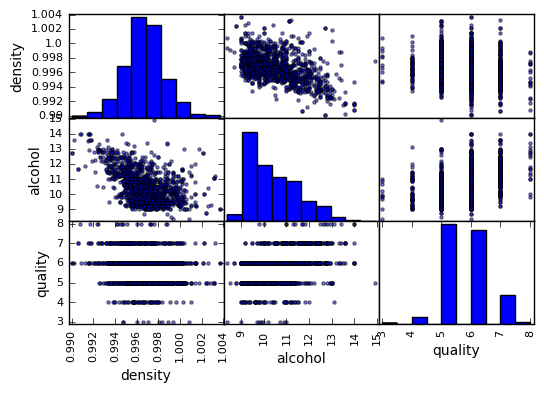

In [34]:
from pandas.tools import plotting
plotting.scatter_matrix(wine[['density','alcohol','quality']])
plt.show()

In [5]:
from statsmodels.formula.api import ols
model = ols("quality ~ alcohol+density", wine).fit()

NameError: name 'wine' is not defined

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     240.7
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           4.38e-92
Time:                        09:46:09   Log-Likelihood:                -1715.9
No. Observations:                1599   AIC:                             3438.
Df Residuals:                    1596   BIC:                             3454.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -33.1524     10.878     -3.048      0.002       -54.489   -11.815
alcohol        0.3914      0.019     20.441      0.000         0.354     0.429
density       34.8217     10.813      3.220      0.001        13.613    56.031
==============================================================================
Omnibus:                       42.954   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.523
Skew:                          -0.181   Prob(JB):                     3.27e-18
Kurtosis:                       4.038   Cond. No.                     9.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
import seaborn
seaborn.pairplot(wine, vars=['density','alcohol'],kind='reg',hue='quality')
plt.show()

NameError: name 'wine' is not defined

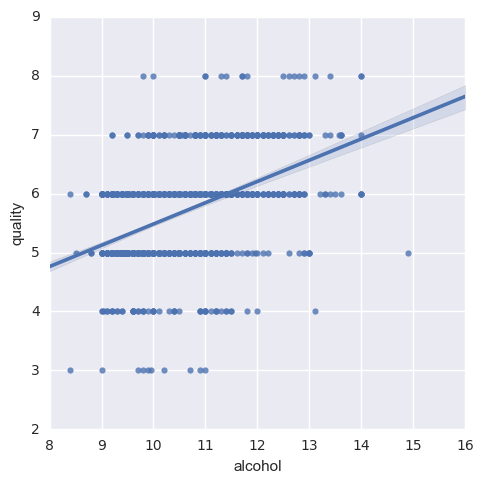

In [103]:
seaborn.lmplot(y='quality', x='alcohol', data=wine)
plt.show()

In [111]:
result=ols(formula='quality~alcohol*density',data=wine).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     160.8
Date:                Thu, 05 Jan 2017   Prob (F-statistic):           4.51e-91
Time:                        09:57:54   Log-Likelihood:                -1715.3
No. Observations:                1599   AIC:                             3439.
Df Residuals:                    1595   BIC:                             3460.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        -115.5999     80.483     -1.436      0.151      -273.464    42.265
alcohol             7.9970      7.356      1.087      0.277        -6.432    22.426
density           117.5799     80.772      1.456      0.146       -40.851   276.011
alcohol:density    -7.6351      7.385     -1.034      0.301       -22.120     6.850
==============================================================================
Omnibus:                       42.343   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.251
Skew:                          -0.178   Prob(JB):                     6.18e-18
Kurtosis:                       4.031   Cond. No.                     9.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
data=pd.read_csv('plotdata.csv')

In [15]:
for i in range(5):
    fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
    data1=data.query('''x<0.15 & g==(%d)'''%i)
    result=ols(formula='y~x',data=data1).fit()
    seaborn.lmplot(y='y', x='x', data=data1)
    x.set_ylabels('firm%d'%(i+1)+''''s rate ''')
    x.set_xlabels('int_rate')
    plt.title('firm%d'%(i+1))
    plt.xlim([0,max(data1['x'])+0.01])
    plt.ylim([-0.05,max(data1['y'])+0.1])
    red_patch = mpatches.Patch(color='red', label='p_value: '+str(round(result.pvalues[1],4))+'\n beta:'+str(round(result.params[1],2)))
    plt.legend(handles=[red_patch])
    plt.savefig(str(i)+'.png')

In [18]:
for i in range(5):
    fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
    data1=data.query('''x<0.15 & g==(%d)'''%i)
    result=ols(formula='y~x',data=data1).fit()
    ax.plot(data1.x,data1.y)
    X_plot = np.linspace(min(data1.x),max(data1.x),100)
    plt.plot(X_plot, X_plot*result.params[1] + result.params[0])
    x.set_ylabels('firm%d'%(i+1)+''''s rate ''')
    x.set_xlabels('int_rate')
    plt.title('firm%d'%(i+1))
    plt.xlim([0,max(data1['x'])+0.01])
    plt.ylim([-0.05,max(data1['y'])+0.1])
    red_patch = mpatches.Patch(color='red', label='p_value: '+str(round(result.pvalues[1],4))+'\n beta:'+str(round(result.params[1],2)))
    plt.legend(handles=[red_patch])
    plt.savefig(str(i)+'.png')